In [162]:
import numpy as np
from sklearn.datasets import make_circles

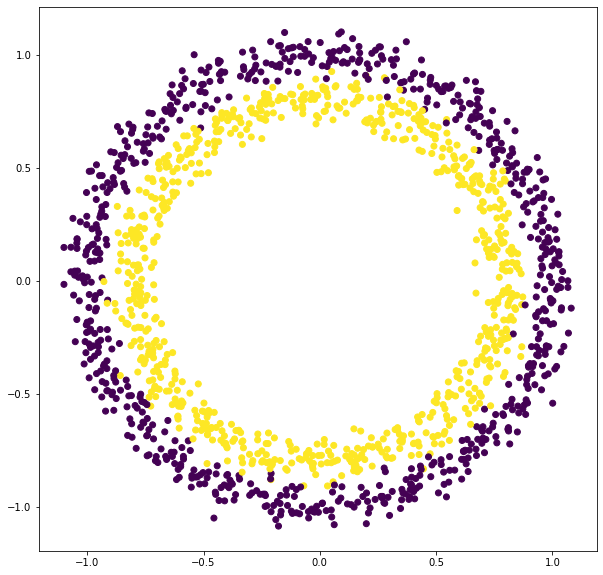

In [167]:
X,Y=make_circles(n_samples=1500,noise=0.05,random_state=10)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y)

In [175]:
# implementation
input_size=2 ## no of features
layers=[20,5] # no. of neurones in 1st and 2nd layer
output=2
# so network architecture [2->20->5->2]

def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [156]:
class neuralnetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        ### dictonary
        model={}
        # 1st layer
        model['w1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        #2nd layer
        model['w2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        # 3rd/output layer
        model['w3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
    
    def forward(self,x):
        w1=self.model['w1']
        b1=self.model['b1']
        
        w2=self.model['w2']
        b2=self.model['b2']
        
        w3=self.model['w3']
        b3=self.model['b3']
        
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3)+b3
        y_=softmax(z3)
        
        self.activation_values=(a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        a1,a2,y_=self.activation_values
        delta3=y_-y
        m=x.shape[0]
        
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        ## update model parameters using gradient descent
        self.model['w1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['w2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['w3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
    
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    
    
## functions outside th class

def loss(y_out,p):
    l=-np.mean(y_out*np.log(p))
    return l

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    y_oht=one_hot(Y,classes)
    
    for ix in range(epochs):
        y_=model.forward(X)
        l=loss(y_oht,y_)
        #print(l)
        training_loss.append(l)
        model.backward(X,y_oht,learning_rate)
    return training_loss

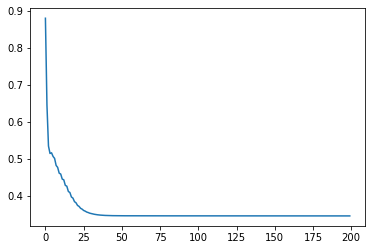

In [176]:
model=neuralnetwork(input_size,layers,output)
ls=train(X,Y,model,200,0.001)
plt.plot(ls)
plt.show()

In [169]:
# xor dataset

In [170]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

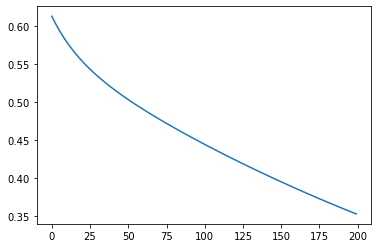

In [171]:
model1=neuralnetwork(input_size,layers,output)
ls=train(x,y,model1,200,0.001)
plt.plot(ls)
plt.show()